In [1]:
import os
import pandas as pd
os.chdir("/Users/vladbuinceanu/Documents/KdG/Data and A.I./Sem 2/Python/Python/Sources")
from IPython import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from functions import *

In [2]:
studenq = pd.read_csv('Questionnaire 22-23.csv', delimiter=';', decimal=',')


# a Create a simularity matrix based on the Kendall rank correlation. (First bring the data in the right format - see slides Coherence- and place this in the data frame fruit_pref_trans)

In [3]:
def split_choices(row):
    return str.split(row, ',')
choices_matrix = studenq['Favorite Fruit'].apply(split_choices)

def split_preferences(row):
    return np.array([str.split(el,'=') for el in row])

preferences_matrix = choices_matrix.apply(split_preferences)

def sort_preferences(row):
    try:
        ranknumbers = row[:,0].astype(int)
        return row[ranknumbers.argsort()][:,1]
    except Exception:
        return np.repeat(np.nan, 10)

sort_preferences(preferences_matrix[0])
fruit_series = preferences_matrix.apply(sort_preferences)

fruit_preferences = pd.DataFrame(zip(*fruit_series), index=range(1,11)).transpose()

def transform_preference(df):
    order = df.loc[0].sort_values() # only if all fruits were used by this student –no doubles-

    index = pd.Series(order, dtype="category")
    copy_df = df.copy()
    for column in copy_df:
        copy_df[column] = copy_df[column].astype(pd.CategoricalDtype(categories=order))
        copy_df[column] = copy_df[column].cat.codes
    new_df= pd.DataFrame(index= index, columns=np.arange(copy_df.shape[0]))
    for i in range(copy_df.shape[0]):
        for j in range(copy_df.shape[1]):
            new_df.iat[copy_df.iat[i,j],i]=j+1
    for column in new_df:
        new_df[column] = pd.to_numeric(new_df[column])
    return new_df

fruit_pref_trans = transform_preference(fruit_preferences)
fruit_pref_trans = fruit_pref_trans.dropna(axis = 'columns')



sim_matrix = fruit_pref_trans.corr(method='kendall')

array(['Orange', 'Banana', 'Kiwi', 'Cherry', 'Plum', 'Strawberry',
       'Melon', 'Pineapple', 'Apple', 'Pear'], dtype='<U10')

# b Use AgglomerativeClustering with the simularity matrix and with the 'complete' option as linkage (why this option? Are there others possible?) to obtain 5 clusters. Which cluster (cluster number) contains the most students?

ANSWER -> FIRST ONE

In [4]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=5, linkage='complete', affinity='precomputed').fit(sim_matrix)
pd.Series(clustering.labels_).value_counts()

/Users/vladbuinceanu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


1    26
2    20
0    16
3     9
4     8
dtype: int64

# 2a. Create a new data frame stud containing the following columns: Shoe Size, Height, Travel Distance, Travel Time and Biden

In [5]:
stud = studenq[['Shoe Size', 'Height', 'Travel Distance', 'Travel Time','Biden']].copy()
stud.isna().sum().sum()
stud = stud.dropna()
stud.index = range(1, stud.shape[0]+1)

0

# 2.b Perform a hierarchical clustering on the data in stud and review the dendrogram. Are there “misfits” amongst the students?

AgglomerativeClustering(n_clusters=4)

Text(0.5, 1.0, 'Dendogram')

Text(0.5, 0, 'point')

Text(0, 0.5, 'Euclidian distance')

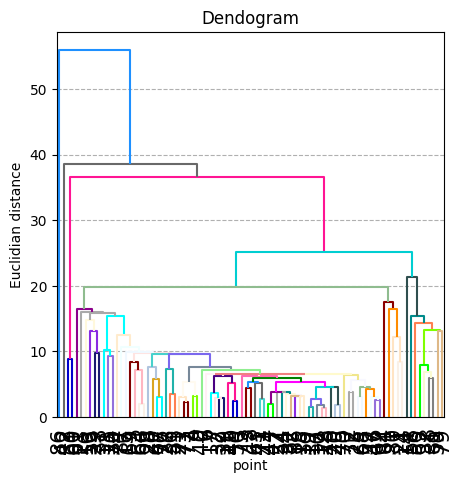

In [6]:
from sklearn.cluster import AgglomerativeClustering
hcmodel = AgglomerativeClustering(n_clusters=4)
hcmodel.fit(stud)

from scipy.cluster.hierarchy import linkage, dendrogram
colors = list(matplotlib.colors.cnames.keys())[0:100:2]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
distances = linkage(stud, method='single')
ax.set_title("Dendogram")
ax.set_xlabel('point')
ax.set_ylabel('Euclidian distance')
ax.grid(linestyle='--', axis = 'y')
dgram = dendrogram(distances, labels=list(range(1, stud.shape[0]+1)), link_color_func=lambda x: colors[x%colors.__len__()], leaf_font_size=15., ax=ax)

plt.show()